In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/FER2013/train/0/Training_3908.jpg")

In [ ]:
img_array.shape

(48, 48, 3)

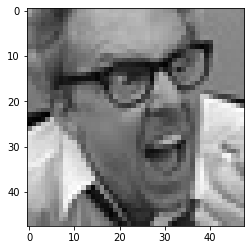

In [ ]:
plt.imshow(img_array)

In [ ]:
datadirectory = "/content/drive/MyDrive/FER2013/train/"

In [ ]:
classes = ["0","1","2","3","4","5","6"]   ## LIST OF CLASSES

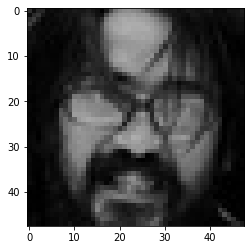

In [ ]:
for category in classes:
  path = os.path.join(datadirectory , category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

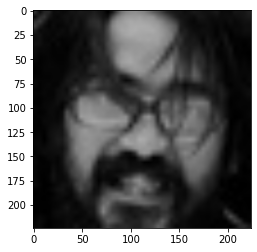

In [ ]:
# img_size = 22   #CHANGED THE SIZE FROM 48 X 48 TO 224 X 224 WHICH IS ACCEPTED BY TRANSFER LEARNING MODEL 
img_size=224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

NOW READING ALL THE IMAGES AND CONVERTING THEM TO ARRAY

In [ ]:
training_data = []
def create_training_Data():
  for category in classes:
    path = os.path.join(datadirectory , category)
    class_num = classes.index(category)   #Labeling or indexing
    for img in os.listdir(path):
       try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size , img_size))
            training_data.append([new_array , class_num])
       except Exception as e:
            pass  

In [ ]:
create_training_Data()

In [ ]:
print(len(training_data))

11774


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
print(len((training_data)))

11774


In [ ]:
x = []  # data / feature
y = [] #label / numbering

for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)  ## coverting x array to 4 Dimension array. because we are USING deep learning architecture such as mobileNet which takes 4D images 


In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape


(11774, 224, 224, 3)

In [ ]:
X= np.array(x)
Y= np.array(y)

#DEEP LEARNING MODEL FOR TRAINING - TRANSFER LEARNING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten


In [ ]:
# model = tf.keras.applications.inception_v3.ResNett50()
# # model = tf.keras.applications.Inception(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')     ##Inception is a pre-trained model
# tf.keras.applications.ResNet50(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(224,),
#     pooling=None,
#     classes=1000,
#     **kwargs
# )

tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

102981632/102967424 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

# TRANSFER LEARNING - TUNING , WEIGHTS WILL START FROM LAST CHECK POINT

In [ ]:
base_input = model.layers[1].input    ##input layer

In [ ]:
base_output = model.layers[-1].output

In [ ]:
base_output   ##last row was deleted, coz they were unneccessary

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
final_output = layers.Dense(128)(base_output)   ## global pooling layer.
## adding new layer after the output of global pooling layer.
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)   ## Classification layer
    ## output layer

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_8')>

In [ ]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
 history = new_model.fit(X, Y, batch_size=32, epochs=1, validation_split=0.1) 

ValueError: ignored

In [ ]:
new_model.save('/content/drive/MyDrive/final_model_95p07.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/final_model_95p07.h5')

In [ ]:
frame=cv2.imread("/content/drive/MyDrive/11.jpg")

In [ ]:
frame = np.array(frame)

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape


In [ ]:
faces =faceCascade.detectMultiScale(gray,1.1,4)  ##open cv code, find all possible faces in a photo, and can also detect multiple faces
for x,y,w,h in faces:
    roi_gray =gray[y:y+h,x:x+w]
    roi_color =frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (225,0,0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(faces) ==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi =roi_color[ey: ey+eh, ex:ex +ew]


In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))  ##face_roi is rgb
final_image =np.expand_dims(final_image,axis=0)  #need 4th dimensions

In [ ]:
Predictions=new_model.predict(final_image)

In [ ]:
Predictions[0]


In [ ]:
type(Predictions)

In [ ]:
Predictions.shape

In [ ]:
result = np.argmax(Predictions[0])
result